<div style="font-weight: bold" align="center">
    <div style="font-size: xx-large; color:#3d6f91">Computación Numérica</div><br>
    <div style="font-size: x-large; color:gray">Práctica 3</div><br>
    <div style="font-size: large; color: #5D8AA8">Óscar Gómez Borzdynski y Alejandro Cabana Suárez</div><br></div><hr>
</div>

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import interpolate

In [2]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b {color: #5D8AA8;}
</style>

## Cuestiones teóricas

<b>1. ¿Dado un conjunto de $n$ puntos, existe siempre un polinomio de grado $m < n-1$ que pase por dichos puntos?</b>

No, por ejemplo, tomando 3 puntos no alineados, no existe ninguna recta que pase por los 3.

<b>2. ¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz permita calcular un polinomio de regresión adecuado?</b>



<b>3. ¿Como podrías transformar el problema de encontrar un polinomio de regresión en un problema de producto de matrices?</b>



<b>4. ¿Crees que,además, es posible calcular el error de regresión a partir de los valores singulares?</b>



## Apartado 1

In [3]:
# a)
d = 2
d += 1

x = np.array([0, 0.25, 0.5, 0.75, 1], ndmin=2).T
y = np.array([1, 1.284, 1.6487, 2.117, 2.7183], ndmin=2).T

X = np.concatenate([x**i for i in range(d)], axis = 1)

In [4]:
# b)
u, s, vh = np.linalg.svd(X)
np.allclose(X, u[:,:d]*s@vh)

True

In [5]:
U = u
S = np.zeros_like(X)
S[:d,:d] = np.diag(s)
V = vh.T

In [6]:
# b) a mano
l,v = np.linalg.eig(X.T@X)

## Apartado 2

In [7]:
c = U.T@y
z = c[:d]/np.diag(S)[:,None]
a = V@z

## Apartado 3

In [8]:
E = np.linalg.norm(c[d:])
print(E)

0.0165569493394339


In [9]:
e = np.linalg.norm(X@a-y)
print(e)

0.016556949339433764


In [10]:
print(E-e)

1.3530843112619095e-16


## Ejercicio opcional

In [11]:
def svd_regression(x, y, degree):
    d = degree + 1
    
    x_ = np.array(x, ndmin=2).T
    y_ = np.array(y, ndmin=2).T

    X = np.concatenate([x_**i for i in range(d)], axis = 1)
    
    u, s, vh = np.linalg.svd(X)

    c = u.T@y_
    z = c[:d]/s[:,None]
    a = vh.T@z
    
    E = np.linalg.norm(c[d:])
    
    return a, E

def eval_svd_regression(x, a):
    d = len(a)
    x_ = np.array(x, ndmin=2).T
    X = np.concatenate([x_**i for i in range(d)], axis = 1)
    
    return X@a

In [12]:
a_d2, E_d2 = svd_regression(x.flatten(), y.flatten(), 2)
a_d4, E_d4 = svd_regression(x.flatten(), y.flatten(), 4)

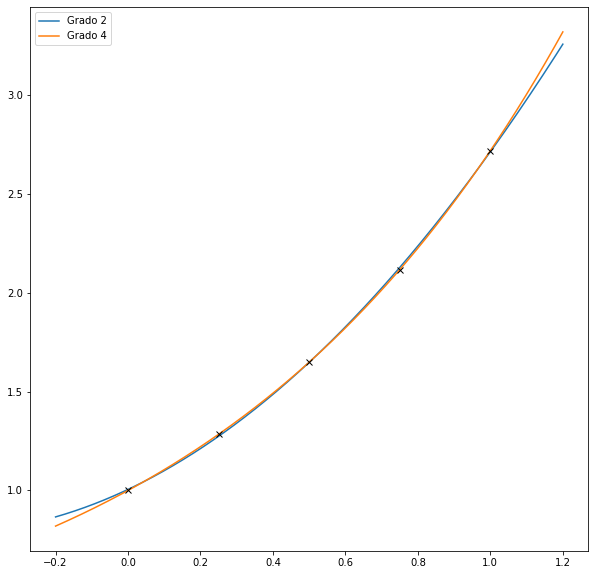

In [33]:
x_test = np.linspace(-0.2,1.2,1000)
x_test = np.sort(np.append(x_test,x))

y_d2 = eval_svd_regression(x_test,a_d2)
y_d4 = eval_svd_regression(x_test,a_d4)

plt.figure(figsize = (10,10))
plt.plot(x_test,y_d2.flatten(), label='Grado 2')
plt.plot(x_test,y_d4.flatten(), label='Grado 4')
plt.plot(x.flatten(),y.flatten(), 'xk')
plt.legend()

In [37]:
m = np.in1d(x_test,x[:,0])
print('Errores grado 2',y_d2.flatten()[m]-y[:,0])
print('Errores grado 4',y_d4.flatten()[m]-y[:,0])

Errores grado 2 [ 0.00513714 -0.01008857 -0.00055714  0.01083143 -0.00532286]
Errores grado 4 [-5.55111512e-16  0.00000000e+00 -4.44089210e-16  0.00000000e+00
 -4.44089210e-16]
